<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
از دید ناحیه
</font>
</h1>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقدمه
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این تمرین قصد داریم تا با استفاده از قطعه‌بندی مبتنی بر ناحیه، قطعه‌بندی را انجام دهیم.
</font>
</p>

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله اول: وارد کردن تصویر
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ابتدا تصویر زیر را بصورت خاکستری بخوانید.
<br>
brain.webp
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
همچنین در صورتیکه نیاز به اعمال پیش‌پردازش میباشد آنرا نیز در این مرحله انجام دهید.
</p>


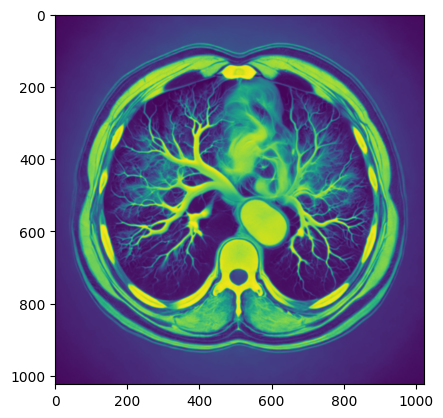

In [36]:
img = cv2.imread('Data/brain.webp', cv2.IMREAD_GRAYSCALE)
img_gaussy = cv2.GaussianBlur(img, (7, 7), 0)
plt.imshow(img_gaussy)
plt.show()


<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله دوم: پیاده‌سازی گسترش ناحیه
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
برای قطعه‌بندی ما از رویکرد گسترش‌ناحیه یا Region Growing استفاده می‌کنیم. شما باید آنرا پیاده‌سازی کنید.
    <br>
    پس از پیاده‌سازی و انجام قطعه‌بندی، باید تصویر قطعه‌بندی شده را ذخیره کنید. توجه کنید که پیش‌زمینه حتما سیاه باشد و پس‌زمینه حتما سفید باشد. تصویر را به نام زیر ذخیره کنید:
    <br>
    region_segment.jpg
</font>
</p>

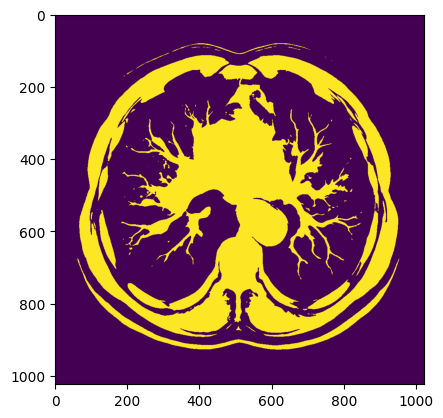

True

In [37]:
seed_point = (100, 100)
threshold = [50, 100, 150, 200]
Is = img_gaussy[seed_point]

def Homogeneity(Is, Ip, th):
    return abs(Is - Ip) <= th

delta = [[-1, -1], [1, -1], [1, 1], [-1, 1], [0, 1], [-1, 0], [1, 0], [0, 1]]


def region_growing(img_gaussy, seed_point, th, delta, Is):
    stack_img = list()
    mask = np.zeros_like(img_gaussy)
    visited = np.zeros_like(img_gaussy)
    stack_img.append(seed_point)
    rows, cols = img_gaussy.shape
    while stack_img:
        x, y = stack_img.pop()
        if visited[y, x]:
            continue
        visited[y, x] = True
        if Homogeneity(int(Is), int(img_gaussy[y, x]), th):
            mask[y, x] = 255
            for dx, dy in delta:
                next_x = x + dx
                next_y = y + dy
                if 0 <= next_y < rows and 0 <= next_x < cols:
                    if not visited[next_y, next_x]:
                        stack_img.append((next_x, next_y))
        else:
            mask[y, x] = 0
    return mask
# images = []
# for th in threshold:
#     images.append(region_growing(img_gaussy, seed_point, th, delta, Is))
#     plt.imshow(images[-1], cmap='gray')
#     plt.show()

th_final = threshold[1]
final_img = 255 - region_growing(img_gaussy, seed_point, th_final, delta, Is)
plt.imshow(final_img)
plt.show()
cv2.imwrite('region_segment.jpg', final_img)

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله سوم: سلول جواب‌ساز
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
بدون هیچگونه تغییری، این سلول را اجرا کنید تا فایل پاسخ شما آماده شود.
</font>
</p>

In [38]:
import zipfile

def compress(file_names):
    print("File Paths:")
    print(file_names)
    # Select the compression mode ZIP_DEFLATED for compression
    # or zipfile.ZIP_STORED to just store the file
    compression = zipfile.ZIP_DEFLATED
    # create the zip file first parameter path/name, second mode
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            # Add file to the zip file
            # first parameter file to zip, second filename in zip
            zf.write('./' + file_name, file_name, compress_type=compression)


file_names = ["notebook.ipynb", "region_segment.jpg"]
compress(file_names)

File Paths:
['notebook.ipynb', 'region_segment.jpg']
